<a href="https://colab.research.google.com/github/fairuznawar122/World-Happiness-Classification/blob/main/World_Happiness_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dataset from Kaggle

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import os
# import shutil

# # Define paths
# drive_path = "/content/drive/My Drive/kaggle.json"
# kaggle_path = "/root/.kaggle/kaggle.json"

# # Create .kaggle directory if it doesn't exist
# os.makedirs("/root/.kaggle", exist_ok=True)

# # Copy the kaggle.json file
# shutil.copy(drive_path, kaggle_path)

# # Set the correct permissions
# os.chmod(kaggle_path, 600)
import os
os.environ['KAGGLE_USERNAME'] = "fariuznawar"
os.environ['KAGGLE_KEY'] = "6c2d1b94eb81cb2616870c4ea4764fda"

!kaggle datasets download -d mathurinache/world-happiness-report

In [5]:
import zipfile
with zipfile.ZipFile("world-happiness-report.zip", "r") as zip_ref:
    zip_ref.extractall("world-happiness-report")


### Accessing the Data files

In [405]:
year = input("Enter the Year: ")
filename = "world-happiness-report/" + year + ".csv"

Enter the Year: 2022


In [406]:
import pandas as pd
df = pd.read_csv(filename)
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


### Data Processing


In [407]:
if(year=="2015"):
  df.drop("Region", axis=1, inplace=True)
  df.drop("Happiness Rank", axis=1, inplace=True)
  df.drop("Dystopia Residual", axis=1, inplace=True)
  df.drop("Standard Error", axis=1, inplace=True)
  df = df.rename(columns={'Economy (GDP per Capita)': 'Economy'})
  df = df.rename(columns={'Trust (Government Corruption)': 'Trust'})
  df = df.rename(columns={'Health (Life Expectancy)': 'Health'})

if(year=="2018"):
  df.drop("Overall rank", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Score': 'Happiness Score'})
  df = df.rename(columns={'Country or region': 'Country'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'GDP per capita': 'Economy'})

if(year=="2020"):
  df.drop("Regional indicator", axis=1, inplace=True)
  df.drop("Standard error of ladder score", axis=1, inplace=True)
  df.drop("upperwhisker", axis=1, inplace=True)
  df.drop("lowerwhisker", axis=1, inplace=True)
  df.drop("Ladder score in Dystopia", axis=1, inplace=True)
  df.drop("Dystopia + residual", axis=1, inplace=True)
  df.drop("Explained by: Log GDP per capita", axis=1, inplace=True)
  df.drop("Explained by: Social support", axis=1, inplace=True)
  df.drop("Explained by: Healthy life expectancy", axis=1, inplace=True)
  df.drop("Explained by: Freedom to make life choices", axis=1, inplace=True)
  df.drop("Explained by: Generosity", axis=1, inplace=True)
  df.drop("Explained by: Perceptions of corruption", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Ladder score': 'Happiness Score'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'Logged GDP per capita': 'Economy'})

if(year=="2022"):
  df.drop("RANK", axis=1, inplace=True)
  df.drop("Whisker-high", axis=1, inplace=True)
  df.drop("Whisker-low", axis=1, inplace=True)
  df.drop("Dystopia (1.83) + residual", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Explained by: GDP per capita': 'Economy'})
  df = df.rename(columns={'Explained by: Social support': 'Social Support'})
  df = df.rename(columns={'Explained by: Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Explained by: Generosity': 'Generosity'})
  df = df.rename(columns={'Explained by: Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Happiness score': 'Happiness Score'})

  # To fix the numerical values in the data
  for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.replace(',', '.')

  # Convert all columns to numeric (excluding non-numeric columns like country names)
  for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle the case if a column can't be converted (keep it as is)
        pass
  df = df[:-1]

df

,Country,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
141,Botswana*,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


Categorizing the countries

In [408]:
possible_column_names = ['Country', 'Country or region', 'Country name']

In [409]:
# Function to check, extract and delete the column
def extract_and_delete_column(df, possible_column_names):
    for name in possible_column_names:
        if name in df.columns:
            extracted_column = df[name]  # Extract column
            df.drop(name, axis=1, inplace=True)  # Delete the column from df
            print(f"✅ Column '{name}' extracted and deleted from df.")
            return extracted_column
    print(f"⚠️ Column not found from: {possible_column_names}")
    return None

final_df = extract_and_delete_column(df, possible_column_names)
final_df = pd.DataFrame(final_df)

split_size = len(final_df) // 3
categories = ['Strong Happy'] * split_size + ['Moderate Happy'] * split_size + ['Weak Happy'] * (len(final_df) - 2 * split_size)
final_df['Category'] = categories

final_df


✅ Column 'Country' extracted and deleted from df.


,Country,Category
0,Finland,Strong Happy
1,Denmark,Strong Happy
2,Iceland,Strong Happy
3,Switzerland,Strong Happy
4,Netherlands,Strong Happy
...,...,...
141,Botswana*,Weak Happy
142,Rwanda*,Weak Happy
143,Zimbabwe,Weak Happy
144,Lebanon,Weak Happy


In [410]:
final_df.drop(final_df.columns[0], axis=1, inplace=True)
df= pd.concat([df, final_df], axis=1)
df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Strong Happy
1,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Strong Happy
2,7.557,1.936,1.320,0.803,0.718,0.270,0.191,Strong Happy
3,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Strong Happy
4,7.415,1.945,1.206,0.787,0.651,0.271,0.419,Strong Happy
...,...,...,...,...,...,...,...,...
141,3.471,1.503,0.815,0.280,0.571,0.012,0.102,Weak Happy
142,3.268,0.785,0.133,0.462,0.621,0.187,0.544,Weak Happy
143,2.995,0.947,0.690,0.270,0.329,0.106,0.105,Weak Happy
144,2.955,1.392,0.498,0.631,0.103,0.082,0.034,Weak Happy


### Categorizing the features : Using Decision Tree


In [411]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X = df[['Health', 'Freedom','Trust', 'Generosity']]  # Features that influence Economy
y = df['Economy']  # Economy is the target

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)
# Extract unique thresholds from Decision Tree
thresholds = np.sort(tree_reg.tree_.threshold[tree_reg.tree_.threshold > 0])  # Remove unused splits

# **Pick only two meaningful thresholds** (1/3 and 2/3 positions)
if len(thresholds) >= 2:
    thresholds = [thresholds[len(thresholds) // 3], thresholds[2 * len(thresholds) // 3]]
else:
    print("Not enough splits from Decision Tree, using quantiles instead.")
    thresholds = list(df['Economy'].quantile([1/3, 2/3]))  # Fallback to quantiles

# Define bin edges and labels
bin_edges = [-np.inf] + list(thresholds) + [np.inf]
bin_labels = ['Low', 'Moderate', 'High']

# Categorize Economy into bins
df['Economy'] = pd.cut(df['Economy'], bins=bin_edges, labels=bin_labels)
df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,7.821,High,1.258,0.775,0.736,0.109,0.534,Strong Happy
1,7.636,High,1.243,0.777,0.719,0.188,0.532,Strong Happy
2,7.557,High,1.320,0.803,0.718,0.270,0.191,Strong Happy
3,7.512,High,1.226,0.822,0.677,0.147,0.461,Strong Happy
4,7.415,High,1.206,0.787,0.651,0.271,0.419,Strong Happy
...,...,...,...,...,...,...,...,...
141,3.471,High,0.815,0.280,0.571,0.012,0.102,Weak Happy
142,3.268,High,0.133,0.462,0.621,0.187,0.544,Weak Happy
143,2.995,High,0.690,0.270,0.329,0.106,0.105,Weak Happy
144,2.955,High,0.498,0.631,0.103,0.082,0.034,Weak Happy


### Categorizing the other features : Custom Bin ranges

In [412]:
# Number of bins/Categories you want
n_bins = 3
category_labels = ['Low', 'Medium', 'High']
# Create equal-width bins for each column
for column in df.columns:
    if column=="Economy" or column=="Category":
      continue
    min_val = df[column].min()- 1e-3  # Minimum value
    max_val = df[column].max()  # Maximum value
    bins = [min_val, min_val + (max_val - min_val) / 3, min_val + 2 * (max_val - min_val) / 3, max_val]
    df[column] = pd.cut(df[column], bins=bins, labels=category_labels)

df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,High,High,High,High,High,Low,High,Strong Happy
1,High,High,High,High,High,Medium,High,Strong Happy
2,High,High,High,High,High,Medium,Low,Strong Happy
3,High,High,High,High,High,Low,High,Strong Happy
4,High,High,High,High,High,Medium,High,Strong Happy
...,...,...,...,...,...,...,...,...
141,Low,High,Medium,Low,High,Low,Low,Weak Happy
142,Low,High,Low,Medium,High,Medium,High,Weak Happy
143,Low,High,Medium,Low,Medium,Low,Low,Weak Happy
144,Low,High,Medium,High,Low,Low,Low,Weak Happy


### User Input Columns

In [413]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

df.drop("Category", axis=1, inplace=True)

selected_df = pd.DataFrame()
# Create multi-select widget for column selection
column_selector = widgets.SelectMultiple(
    options=df.columns,
    value=[df.columns[0]],  # Default selection
    description='Select Columns:',
    style={'description_width': 'initial'},  # Adjust description width
    layout=widgets.Layout(
        width='70%',  # Set width
        height='auto',  # Set height
        border='2px solid black',  # Border style
        padding='10px',  # Padding inside box
        margin='20px auto',  # Margin around box
    )
)

# Output widget to display the selected columns
output = widgets.Output()

def show_selected_columns(change):
    with output:
        output.clear_output()  # Clear previous output
        selected_columns = list(column_selector.value)  # Get selected columns

        if selected_columns:
            print()
            display(df[selected_columns].head())  # Show first 5 rows
        else:
            print("⚠️ No columns selected!")

# Attach the function to update on selection
column_selector.observe(show_selected_columns, names='value')

# Button to save the selected columns

def save_selected_columns(b):
    selected_columns = list(column_selector.value)

    if not selected_columns:
        print("⚠️ Please select at least one column!")
        return
    global selected_df
    # selected_df = pd.concat([df[selected_columns],selected_df], axis=1)
    selected_df = df[selected_columns]
    # print()
    # print()
    # print(selected_df.head())
    print("✅ Saved selected columns to \"selected_df\" dataframe!")




save_button = widgets.Button(
    description="💾 Save Selected Columns",
    button_style="info",  # 'success' = Green, 'info' = Blue, 'warning' = Orange, 'danger' = Red
    tooltip="Click to save selected columns",
    icon="check",  # Adds a checkmark icon
    layout=widgets.Layout(width='250px', height='40px'),  # Adjust button size
    margin='20px auto',  # Margin around box
)
print()
# save_button = widgets.Button(description="Confirm Selection")
save_button.on_click(save_selected_columns)
print()
print()
# Display everything
display(column_selector, output, save_button)


SelectMultiple(description='Select Columns:', index=(0,), layout=Layout(border='2px solid black', height='auto…

Output()

Button(button_style='info', description='💾 Save Selected Columns', icon='check', layout=Layout(height='40px', …

✅ Saved selected columns to "selected_df" dataframe!
✅ Saved selected columns to "selected_df" dataframe!


In [422]:
selected_df

,Happiness Score,Economy,Social Support
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
141,1,0,2
142,1,0,1
143,1,0,2
144,1,0,2


In [427]:
df=selected_df
df= pd.concat([df, final_df], axis=1)
df

,Happiness Score,Economy,Social Support,Category
0,0,0,0,Strong Happy
1,0,0,0,Strong Happy
2,0,0,0,Strong Happy
3,0,0,0,Strong Happy
4,0,0,0,Strong Happy
...,...,...,...,...
141,1,0,2,Weak Happy
142,1,0,1,Weak Happy
143,1,0,2,Weak Happy
144,1,0,2,Weak Happy


### Decision Tree Classifier

In [424]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree


# Encode categorical values to numerical values (Low->0, High->2)
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

# Split features and target
X = df.drop(columns=['Category'])  # Features
y = df['Category']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred= tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



# # Detailed Visualization of the Decision Tree
# plt.figure(figsize=(12, 6))
# plot_tree(tree_model, feature_names=X.columns, class_names=['Strong Happy', 'Moderate Happy', 'Weak Happy'], filled=True)
# plt.show()


Accuracy: 90.00%


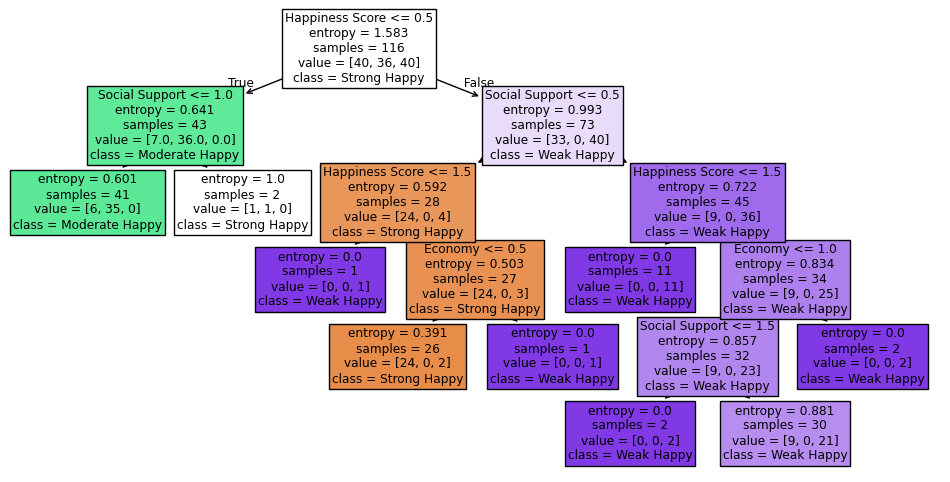

In [425]:
# Detailed Visualization of the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=['Strong Happy', 'Moderate Happy', 'Weak Happy'], filled=True)
plt.show()


### Visualizing the tree

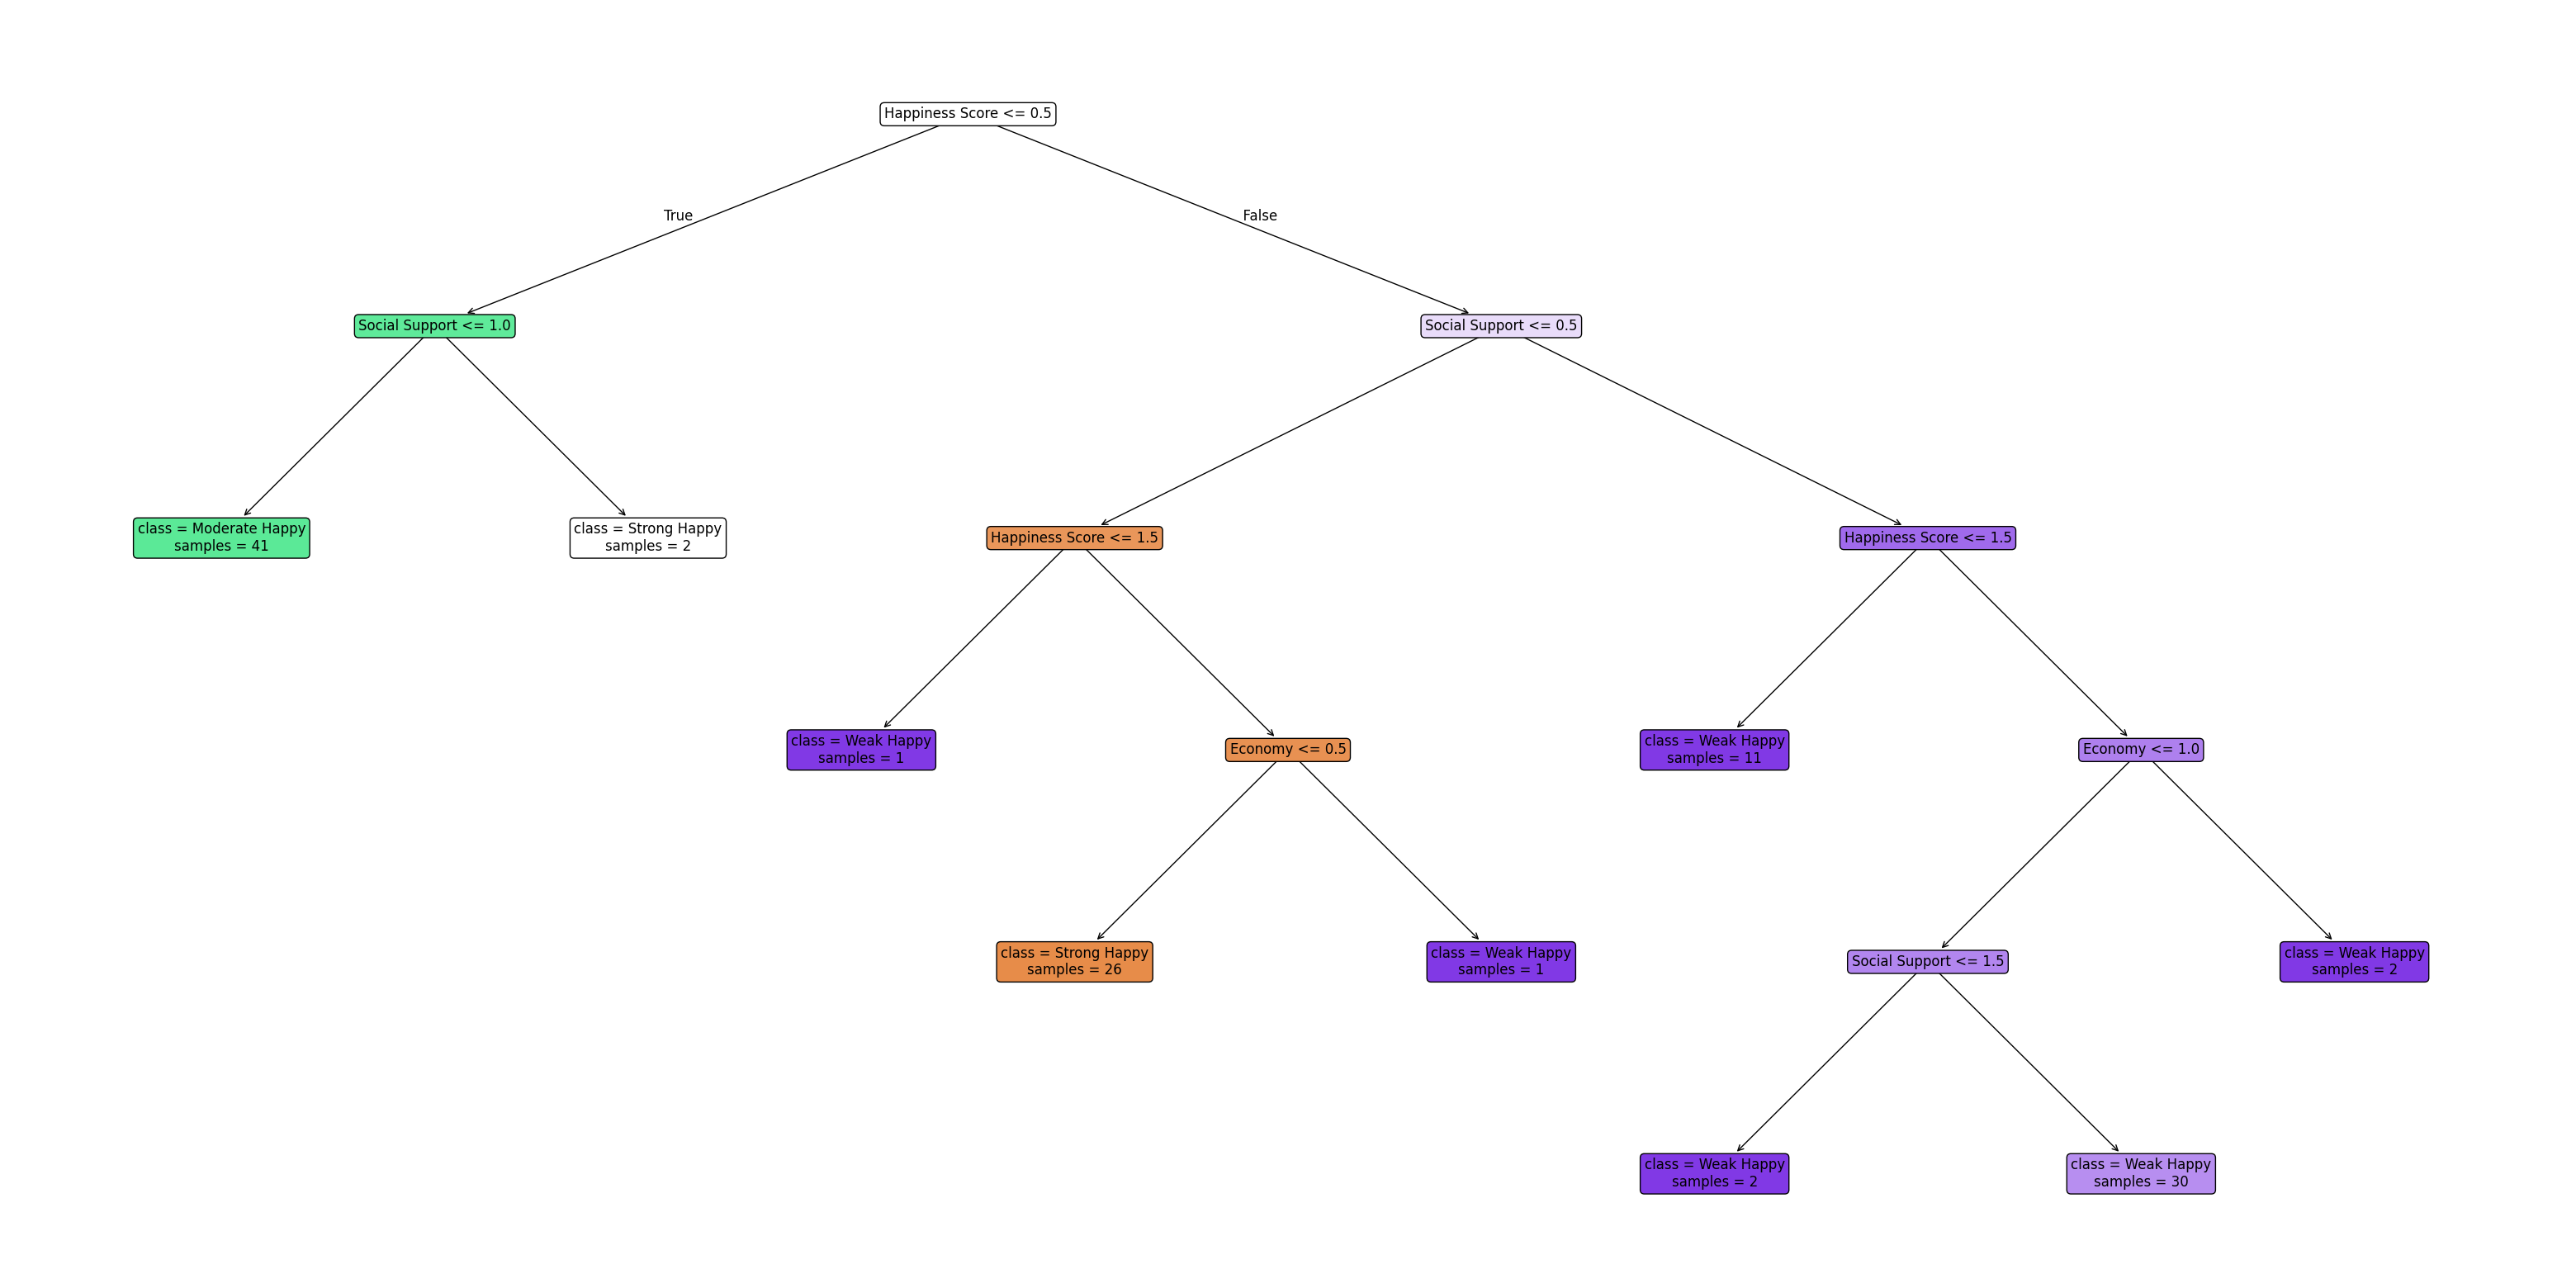

In [426]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(40, 20))  # Set the size of the plot
ax = plot_tree(tree_model,
               filled=True,
               feature_names=X.columns,
               class_names= ['Strong Happy', 'Moderate Happy', 'Weak Happy'],
               impurity=False,    # Remove Gini impurity
               node_ids=False,    # Remove node ids
               proportion=False,  # Remove proportions
               rounded=True,
               fontsize=12)      # Make nodes rounded

# Loop through the nodes and remove the "value" label from them
for ax_ in plt.gcf().axes:
    for text in ax_.texts:
        current_text = text.get_text().split("\n")

        # If this is a leaf node, set the text to the class name only
        if len(current_text) == 3:  # Leaf node (only class name)
            class_name = current_text[2] + "\n"
            class_name += current_text[0]  # Extract class name
            text.set_text(class_name)  # Set only the class name text

        elif len(current_text) > 3:  # Non-leaf node (feature name)
            feature_name = current_text[0]  # The feature name part
            text.set_text(feature_name)  # Set only the feature name text

plt.show()


### Finding the correct and incorrect Classifications

In [428]:

feature_mapping = {0: 'Low', 1: 'Moderate', 2: 'High'}  # Map numerical values to strings
class_mapping = {0: 'Weak Happy', 1: 'Moderate Happy', 2: 'Strong Happy'}

df_results = pd.DataFrame(X_test.reset_index(drop=True), columns=X.columns)  # Convert X_test to DataFrame with feature names
for column in df_results.columns:
    df_results[column] = df_results[column].map(feature_mapping)  # Map numerical values to strings
df_results.shape


# Convert y_test and y_pred to pandas Series
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

# Map the numerical labels to class names
y_test_series = y_test_series.map(class_mapping).reset_index(drop=True)
y_pred_series = y_pred_series.map(class_mapping).reset_index(drop=True)

# Combine into a DataFrame for easy comparison
df_results['Actual'] = y_test_series  # Add actual labels (y_test) to the DataFrame
df_results['Predicted'] = y_pred_series
df_results

,Happiness Score,Economy,Social Support,Actual,Predicted
0,Low,Low,Low,Moderate Happy,Moderate Happy
1,High,Low,Low,Strong Happy,Weak Happy
2,Low,Low,Low,Moderate Happy,Moderate Happy
3,Low,Low,Low,Moderate Happy,Moderate Happy
4,Low,Low,Low,Moderate Happy,Moderate Happy
5,High,Low,Moderate,Strong Happy,Strong Happy
6,Low,Low,Low,Moderate Happy,Moderate Happy
7,High,Low,Low,Weak Happy,Weak Happy
8,High,Low,Low,Weak Happy,Weak Happy
9,Low,Low,Low,Moderate Happy,Moderate Happy


In [429]:
# Filter out correct and incorrect classifications
correct_classifications = df_results[df_results['Actual'] == df_results['Predicted']]
incorrect_classifications = df_results[df_results['Actual'] != df_results['Predicted']]

# Display the results
print("Correct Classifications:")
print(correct_classifications)
print(correct_classifications.shape)
print("\nIncorrect Classifications:")
print(incorrect_classifications)
print(incorrect_classifications.shape)

Correct Classifications:
   Happiness Score Economy Social Support          Actual       Predicted
0              Low     Low            Low  Moderate Happy  Moderate Happy
2              Low     Low            Low  Moderate Happy  Moderate Happy
3              Low     Low            Low  Moderate Happy  Moderate Happy
4              Low     Low            Low  Moderate Happy  Moderate Happy
5             High     Low       Moderate    Strong Happy    Strong Happy
6              Low     Low            Low  Moderate Happy  Moderate Happy
7             High     Low            Low      Weak Happy      Weak Happy
8             High     Low            Low      Weak Happy      Weak Happy
9              Low     Low            Low  Moderate Happy  Moderate Happy
10             Low     Low            Low  Moderate Happy  Moderate Happy
11            High     Low           High    Strong Happy    Strong Happy
12        Moderate     Low           High    Strong Happy    Strong Happy
13           

In [398]:
incorrect_classifications

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Actual,Predicted
1,High,Low,Low,High,High,High,Moderate,Strong Happy,Weak Happy
19,Low,Low,Low,Low,Low,Moderate,Moderate,Weak Happy,Moderate Happy
24,Low,Low,Low,High,Low,High,Moderate,Moderate Happy,Weak Happy
25,High,Low,High,High,Low,Moderate,Moderate,Weak Happy,Strong Happy


In [399]:
correct_classifications

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Actual,Predicted
0,Low,Low,Low,High,Low,Moderate,Moderate,Moderate Happy,Moderate Happy
2,Low,Low,Low,Low,Low,Moderate,Moderate,Moderate Happy,Moderate Happy
3,Low,Low,Low,Low,Low,Moderate,High,Moderate Happy,Moderate Happy
4,Low,Low,Low,Low,Low,High,Moderate,Moderate Happy,Moderate Happy
5,High,Low,Moderate,High,High,High,Moderate,Strong Happy,Strong Happy
6,Low,Low,Low,Low,Low,Moderate,High,Moderate Happy,Moderate Happy
7,High,Low,Low,Low,High,Moderate,High,Weak Happy,Weak Happy
8,High,Low,Low,Low,High,High,Moderate,Weak Happy,Weak Happy
9,Low,Low,Low,Low,High,Moderate,High,Moderate Happy,Moderate Happy
10,Low,Low,Low,Low,Low,High,Low,Moderate Happy,Moderate Happy
